# Building a Simple Neural Network with Keras

This simple tutorial shows show to build a simple NN with Keras to recognize digits. We gonna use Google Colab with GPU support to train our neural network.

## Setup Working Environment on Colab

### Install required libraries

In [1]:
!apt update && apt install -y libsm6 libxext6

Get:1 http://security.ubuntu.com/ubuntu artful-security InRelease [78.6 kB]
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [78.6 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease [72.2 kB]
Get:5 http://security.ubuntu.com/ubuntu artful-security/universe Sources [12.0 kB]
Get:6 http://security.ubuntu.com/ubuntu artful-security/universe amd64 Packages [55.0 kB]
Get:7 http://archive.ubuntu.com/ubuntu artful-updates/universe Sources [29.3 kB]
Get:8 http://security.ubuntu.com/ubuntu artful-security/main amd64 Packages [171 kB]
Get:9 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 Packages [277 kB]
Get:10 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 Packages [110 kB]
Get:11 http://archive.ubuntu.com/ubuntu artful-backports/universe amd64 Packages [3,587 B]
Fetched 887 kB in 1s (482 kB/s)
Reading package lists... Done
Building dependency tree       
Reading state informati

7Progress: [ 95%] [#######################################################...] 8Processing triggers for libc-bin (2.26-0ubuntu2.1) ...

78

### Install Keras

In [0]:
!pip install -q keras

## Now it's time to build a neural network

First let's import some prerequisites

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


### Loading training data

In [4]:
nb_classes = 10

# the data is shuffled and split between train and test sets
(X_train, y_train) , (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


#### Let's look at some examples of the training data

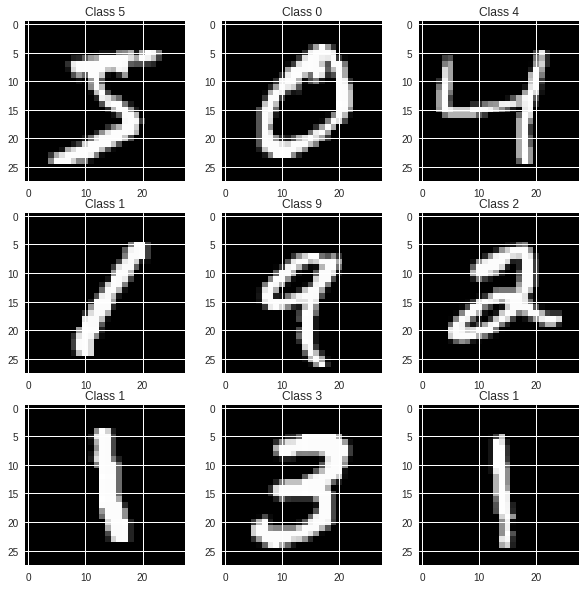

In [5]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Class {}".format(y_train[i]))

### Format the data for training

Our NN is going to take a single vector for each traning example, so we need to reshape the input from 28X28 image to a single 784 dimensional vector. We also need to scale the value to be in the range [0-1].

In [6]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Modify the target value to be one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Build the NN

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
model.add(Dropout(0.2))   #    # Dropout helps protect the model from "overfitting" the training data
model.add(Dense(512))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution,
                                 # that its values are all non-negative and sum to 1.

## Compile the model

Keras is built on top of Theano (and now TensorFlow as well), both packages that allow you to define a *computation graph* in Python, which they then compile and run efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical crossentropy*, and is a loss function well-suited to comparing two probability distributions.

Here our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

The optimizer helps determine how quickly the model learns, how resistent it is to getting "stuck" or "blowing up". We won't discuss this in too much detail, but "adam" is often a good choice (developed here at U of T).

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model

This is the fun part: you can feed the training data loaded in earlier into this model and it will learn to classify digits

In [10]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4,
          verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 4s 70us/step - loss: 0.2388 - acc: 0.9269 - val_loss: 0.1138 - val_acc: 0.9642
Epoch 2/4
60000/60000 [==============================] - 3s 55us/step - loss: 0.1037 - acc: 0.9683 - val_loss: 0.0836 - val_acc: 0.9739
Epoch 3/4
60000/60000 [==============================] - 3s 55us/step - loss: 0.0730 - acc: 0.9773 - val_loss: 0.0692 - val_acc: 0.9807
Epoch 4/4
60000/60000 [==============================] - 3s 55us/step - loss: 0.0615 - acc: 0.9804 - val_loss: 0.0700 - val_acc: 0.9783


## Finally, evaluate its performance

In [12]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07003528476214851
Test accuracy: 0.9783


### Inspecting the output

In [0]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

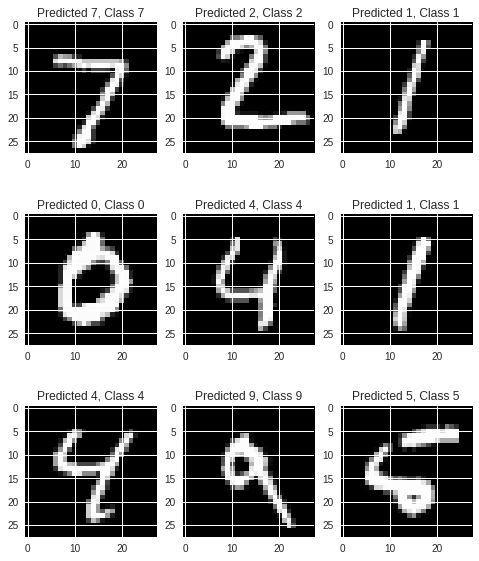

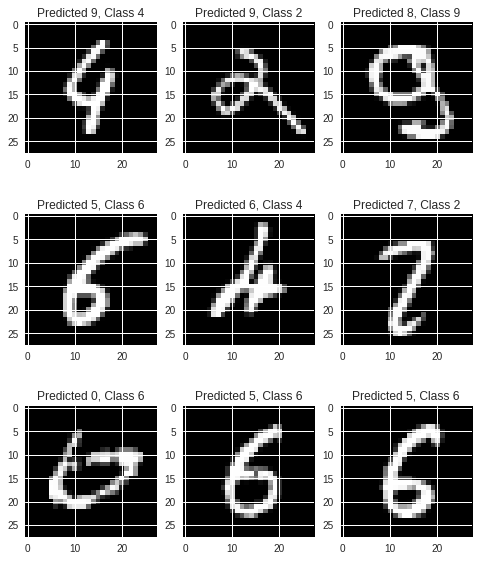

In [14]:
plt.figure(figsize=(8,10))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure(figsize=(8,10))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

## That's all!

You can find lots of great examples at Keras homepage at http://keras.io or it's github https://github.com/fchollet/keras. Try them and we can create more complex NN with better performance.